# Lab 1: Set Up the Lab Environment

This introductory lab guides the attendees with the following activities:

1. Setting up the AI Project in the AI Foundry
2. Deploying an LLM and embedding models
3. Establish connectivity from VS Code to the AI Project
4. Perform a simple Chat completion call to the model

#### Step 1: Creating AI Project in AI Foundry </h4>

1. Login to AI Foundry at https://ai.azure.com
2. Click on 'Create project' at the top of the screen
3. Give your project a name
4. Click 'Create new hub' and give your hub a name. Click 'Next'.
5. Expand the 'Azure resources to be created' section. Notice that a new resource group and some other services are created for you. Select 'Customize'.
6. We will be using an Azure AI Search service in these labs, so we want to set that up as well. Click 'Create new AI Search' and give it a name. Click 'Next' and proceed to the Review and finish page.
7. Confirm your setup looks something like this and click 'Create':

#### Step 2: Deploy gpt-4o model in your AI Foundry project

1. In you AI Foundry project, under My assets section, click on the 'Models + endpoints'.
2. Click on Deploy model and Deploy base model.
3. Select gpt-4o and then press **Confirm**.
4. Select **Customize** and set the **Model version** to 2024-08-06 and the **Tokens per Minute Rate Limit** to 200k.

#### Step 5: Install dependencies, create a virtual environment, and create an environment variables file

1. Open a new terminal and navigate to the AZURE-AI-AGENTS-LABS project directory, which you cloned from GitHub. Run the below powershell commands to create and activate your virtual environment:
    
    ```powershell
    python -m venv venv
    venv/Scripts/activate
2. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This installs all the required packages:
    
    ```powershell
    pip install -r requirements.txt
3. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This creates your .env file:
    
    ```powershell
    cp sample.env .env
4. Update your newly created .env file with your environment variables
    1. You'll need your Foundry Project connection string, which you can get from the **Overview** page:
    
    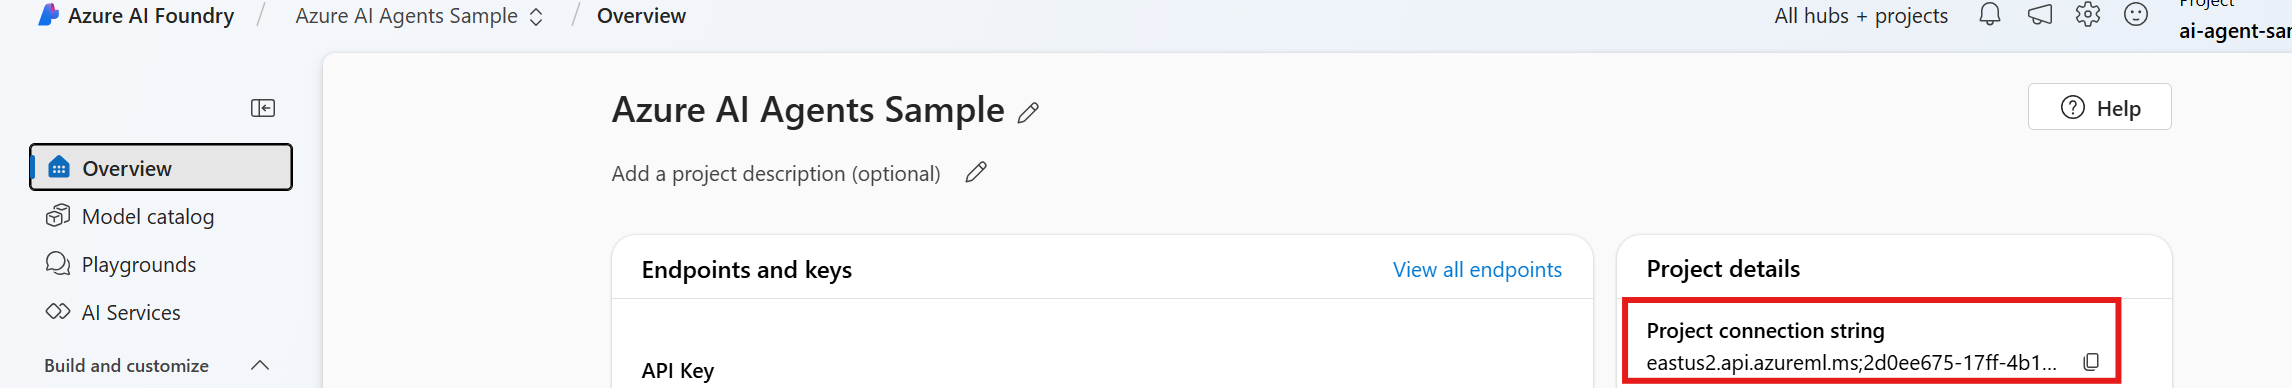

    2. You'll also need your model name, endpoint, and API key. You can get this information by navigating to **Models + endpoints** under **My assets**. Click on the `gpt-4o` model that you deployed and you should see the needed environment variables.

5. Be sure to save your .env file after updating.

#### Step 5: Test your lab environment

To test that your lab was setup successfully, run the below code that sends a message to the deployed model, asking it to tell a joke.

In [ ]:
# Import required libraries and modules
import os                                     # For accessing environment variables
from azure.ai.projects import AIProjectClient # Azure AI Project client for interacting with AI Foundry
from azure.identity import DefaultAzureCredential # For Azure authentication
from dotenv import load_dotenv                # To load environment variables from .env file

# Load environment variables from .env file
# override=True ensures that variables in .env override existing environment variables
load_dotenv(override=True)

True

In [ ]:
# Retrieve the AI Foundry project connection string from environment variables
# This connection string is used to authenticate and connect to your AI Foundry project resources
project_connection_string = os.getenv("AIPROJECT_CONNECTION_STRING")
model = os.getenv("CHAT_MODEL")
api_key = os.getenv("CHAT_MODEL_API_KEY")

# Verify variables
if not project_connection_string or not model:
    raise ValueError("Missing required environment variables. Check AIPROJECT_CONNECTION_STRING and CHAT_MODEL in .env file.")

In [ ]:
# Initialize the AI Project client using the connection string and DefaultAzureCredential
# This establishes a connection to your AI Foundry project to access models and services
try:
    project = AIProjectClient.from_connection_string(
        conn_str=project_connection_string, credential=DefaultAzureCredential()
    )
except Exception as e:
    print(f"Failed to connect to project: {e}")
    raise


In [ ]:
# Create an agent for this session using the project client
# An agent is an instance of an AI assistant with specific instructions and capabilities
# We're using the gpt-4o model to power this agent
# The agent will respond to user messages according to the provided instructions
agent = project.agents.create_agent(
    model="gpt-4o",
    name="Agent123",
    instructions="You are helpful AI assistant. Answer the user's questions."     
    )
print(f"Created agent, agent ID: {agent.id}")

Created agent, agent ID: asst_JCProRDznSkPegGLntRCQtYX


In [ ]:
# Create a new thread for conversation with the agent
# A thread represents a conversation session and maintains the history of messages
# This allows us to send multiple messages in the same conversation context
thread = project.agents.create_thread()
print(f"Created thread, thread ID: {thread.id}")

Created thread, thread ID: thread_mBAu8GGJ1wmJy5HvCbDCkA4k


In [ ]:
# Send a message to the agent in the conversation thread
# This creates a new user message in the specified thread
# The message content is a question asking for a joke about teddy bears
# The create_message method returns the created message object with its ID
message = project.agents.create_message(
    thread_id=thread.id,
    role="user",
    content="Hey, can you tell a joke about teddy bear?"
    )
print(f"Created message, ID: {message.id}")


Created message, ID: msg_6s80eG0u5PJafBEwQDcHH2n4


In [ ]:
# Create and process a run in the conversation thread with our agent
# A run is a request to the agent to generate a response to messages in the thread
# This method sends the request to the model and waits for the processing to complete
# It handles the entire lifecycle of a run, from creation to completion or failure
run = project.agents.create_and_process_run(thread_id=thread.id, agent_id=agent.id)
    # [END create_and_process_run]
print(f"Run finished with status: {run.status}")

# Check if the run failed and display the error message
if run.status == "failed":
        print(f"Run failed: {run.last_error}")

Run finished with status: RunStatus.COMPLETED


In [ ]:
# Retrieve all messages from the conversation thread
# The list_messages method returns a paginated list of messages ordered by creation time
# This allows us to see the full conversation history including the agent's response
messages = project.agents.list_messages(thread_id=thread.id)

for msg in messages.data:
    print(f"Message ID: {msg.id}")
    print(f"Role: {msg.role}")
    print("Content:")
    for content in msg.content:
        if content['type'] == 'text':
            print(content['text']['value'])
    print("-" * 50)

# Delete the agent once done
project.agents.delete_agent(agent.id)
("Deleted agent")

Message ID: msg_DYxmhc6jkDEP4upxUuySCoL2
Role: MessageRole.AGENT
Content:
Sure! Here's a joke for you:

Why didn't the teddy bear finish his dessert?

Because he was already stuffed!
--------------------------------------------------
Message ID: msg_6s80eG0u5PJafBEwQDcHH2n4
Role: MessageRole.USER
Content:
Hey, can you tell a joke about teddy bear?
--------------------------------------------------


'Deleted agent'